In [1]:
import numpy as np
import pandas as pd
import random
from copy import deepcopy
import matplotlib.pyplot as plt

In [2]:
class city():
    def __init__(self,name,x,y):
        self.name=name
        self.x=x
        self.y=y
        
    def __repr__(self):
        print(self.name,self.x,self.x)
        return ''

In [3]:
def calc_dist(p1,p2):
    return np.sqrt((p1.x-p2.x)**2+(p1.y-p2.y)**2)

In [4]:
def calc_cost(crom, mat):
    total_cost = 0
    lst = crom.path
    n=len(lst)
    # sum up the distances between each two adjacent genes
    for i in range(1,n):
        total_cost += mat[lst[i].name][lst[i-1].name]
    
    total_cost += mat[lst[0].name][lst[-1].name]
    return total_cost

In [5]:
def gen_dist_matrix(data):
    n = len(data)
    mat = {}   
    for point in data: 
        key = point.name
        mat[key] = {}
        # for each data point calc the distance between it and all the other points
        for j in range(n):
            p2 = data[j]
            c = p2.name
            mat[key][c] = calc_dist(point,p2)
                
    return mat

# **TSP using N-N**

In [6]:
def pick_move(data,city,mat,vis):
    min_dist = np.inf
    cur = -1
    for point in data:
        if point.name not in vis:
            if mat[city.name][point.name] <  min_dist:
                min_dist = mat[city.name][point.name]
                cur=point
    return cur, min_dist

In [7]:
def generations(data):
    n=len(data)
    # 1- generate distance matrix
    dist_mat = gen_dist_matrix(data)
    vis = {}
    #chose a random start C0
    C0 = random.randrange(n-1)
    city = data[C0] 
    path = [city]
    vis[city.name] = 1
    
    total_cost=0
    # loop until construct one path of length n
    while len(vis) < n:
        # choose the next city in crom according to the shortest path
        nxt,cost=pick_move(data,city, dist_mat,vis)
        # append city into path and mark it in the visited list
        path.append(nxt)
        vis[nxt.name] = 1
        # update the current city
        city= nxt
        total_cost+=cost
        
    total_cost+=dist_mat[city.name][path[0].name]
    path.append(path[0])
    
    return path,total_cost

# Read data here

In [8]:
df=pd.read_csv('15-Points.csv')
df

,x,y,City
0,5.500000e-08,9.860000e-09,1
1,-2.887330e+01,-7.980000e-08,2
2,-7.929160e+01,-2.140330e+01,3
3,-1.465770e+01,-4.338960e+01,4
4,-6.474730e+01,2.189820e+01,5
5,-2.905850e+01,-4.321670e+01,6
6,-7.207850e+01,1.815810e-01,7
7,-3.603660e+01,-2.161350e+01,8
8,-5.048080e+01,7.374470e+00,9
9,-5.058590e+01,-2.158820e+01,10


In [9]:
data = [city(c,x,y) for c,x,y in zip(df['City'], df['x'], df['y'])]

In [10]:
path,cost=generations(data)

In [11]:
path

9 -50.4808 -50.4808
15 -43.07 -43.07
2 -28.8733 -28.8733
13 -21.4983 -21.4983
1 5.5e-08 5.5e-08
11 -0.135819 -0.135819
4 -14.6577 -14.6577
6 -29.0585 -29.0585
8 -36.0366 -36.0366
10 -50.5859 -50.5859
12 -65.0866 -65.0866
14 -57.5687 -57.5687
3 -79.2916 -79.2916
7 -72.0785 -72.0785
5 -64.7473 -64.7473
9 -50.4808 -50.4808


[, , , , , , , , , , , , , , , ]

In [12]:
print('Cost is : ',cost)

Cost is :  292.50579675888645


In [13]:
def plot_cities(cities):
    # Extract x and y coordinates into separate lists
    x_coords = [city.x for city in cities]
    y_coords = [city.y for city in cities]

    # Create a Matplotlib figure
    fig, ax = plt.subplots()

    # Plot cities as scatter points
    ax.scatter(x_coords, y_coords)

    # Plot path between cities as lines
    for i in range(len(cities)-1):
        curr_city = cities[i]
        next_city = cities[i+1]
        ax.plot([curr_city.x, next_city.x], [curr_city.y, next_city.y],marker='>')

    # Show the plot
    plt.show()

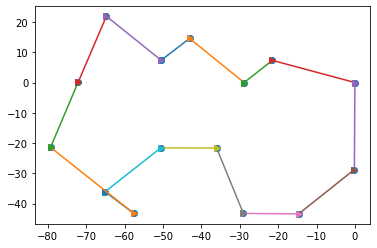

In [14]:
plot_cities(path)